<a href="https://colab.research.google.com/github/LeonardoDrLourenco/IA2_AtividadeGANs/blob/main/GANsAtividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome**: Daniel Cocolete | Leonardo Lourenço

**As Redes Adversárias Generais (GANs) são modelos de aprendizagem profunda que consistem em duas redes neurais: a geradora e a discriminadora, que competem entre si. O gerador gera novos dados a partir de ruído aleatório, enquanto o discriminador se esforça para diferenciar dados autênticos de dados gerados. A meta é que o gerador forneça dados tão autênticos que o classificador não consiga distingui-los**.
**Essa competição impulsiona o aprendizado e a geração de novos dados**.

## Importações

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential

numpy e tensorflow - são bibliotecas necessárias para manipulação de dados numéricos e construção de modelos de aprendizado profundo

Sequential - classe usada para construir modelos de redes neurais de forma sequencial em keras.

layers - contém as camadas das redes usadas.


## Funções

In [ ]:
def build_generator():
    model = Sequential([
        layers.Dense(16, activation='relu', input_dim=1),
        layers.Dense(1)
    ])
    return model

def build_discriminator():
    model = Sequential([
        layers.Dense(16, activation='relu', input_dim=1),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

`build_generator` - cria o gerador, com duas camadas, `dense(16...)` recebe um vetor de dimensão 1 e aplica em 16 neurônios. E o `dense(1`) que gera o dado "falso".

`build_discriminator` - cria o discriminador, que tenta distinguir entre dados reais e gerados. Também possui duas camadas, onde produz um valor único sendo (1) dado real ou (0) dado falso.

O discrimador é compilado pelo otimizador Adam, que ajusta dinamicamente a taxa de aprendizado para cada parâmetro e a função `binary_crossentropy`, que mede a diferença entre as previsões e os rótulos real ou falso.

## Conectando o Gerador ao Descriminador

In [ ]:
# Conectando o gerador ao discriminador
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(optimizer='adam', loss='binary_crossentropy')

real_data = np.array([[6.0], [7.0], [8.0]])
labels_real = np.ones((3, 1))  # Rótulos para dados reais (1)
labels_fake = np.zeros((3, 1)) # Rótulos para dados falsos (0)

epochs = 10
batch_size = 3

for epoch in range(epochs):
    # Gerando dados falsos (números)
    noise = np.random.normal(0, 1, (batch_size, 1))
    generated_data = generator.predict(noise)

    # Treinando o discriminador com dados reais e falsos
    d_loss_real = discriminator.train_on_batch(real_data, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)

    # Treinando o gerador (enganar o discriminador)
    noise = np.random.normal(0, 1, (batch_size, 1))
    gan_loss = gan.train_on_batch(noise, labels_real)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss D Real: {d_loss_real}, Loss D Fake: {d_loss_fake}, Loss G: {gan_loss}")


noise = np.random.normal(0, 1, (5, 1))
generated_numbers = generator.predict(noise)
print("Números gerados:", generated_numbers)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Epoch 0, Loss D Real: 4.895510196685791, Loss D Fake: 2.794741630554199, Loss G: [array(2.7947416, dtype=float32), array(2.7947416, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Números gerados: [[-0.2694505 ]
 [-0.11179662]
 [-0.1050724 ]
 [-0.2044823 ]
 [-0.22260061]]


O gerador e o discriminador são conectados para formar o GAN, congelando os pesos do discriminador para que ele não seja ajustado enquanto o gerador tenta enganá-lo. O GAN é compilado para minimizar a perda do gerador.

Os dados reais são uma matriz [[6.0], [7.0], [8.0]], com rótulos reais sendo 1 e rótulos falsos (dados gerados) sendo 0.

Durante 10 épocas, o treinamento segue três etapas: geração de dados falsos, treinamento do discriminador com dados reais e falsos, e, por fim, treinamento do gerador para enganar o discriminador.

Após o treinamento, novos números são gerados pelo gerador a partir de ruído aleatório e impressos.

In [ ]:
Neste exemplo, usaremos o conjunto de dados MNIST, que contém imagens de dígitos manuscritos, para treinar a GAN a gerar imagens semelhantes.

Passos do Código:
Construir o Gerador e o Discriminador.
Definir o Modelo GAN.
Treinar a GAN.
Gerar e Visualizar Imagens.

## Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import mnist

matplotlib - é usada para gerar gráficos e visualizações.

mnist - conjunto de dados popular de dígitos manuscritos, contém 60.000 imagens de treino e 10.000 imagens de teste de dígitos de 0 a 9.

## Carregar e pré-processar dados

In [ ]:
# Carregar o conjunto de dados nor
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalizar para o intervalo [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Adicionar a dimensão do canal

`mnist.load_data` - carrega o conjunto de dados MNISt, com imagens 28x28 em escala de cinza. Como os labels não são usadas na GAN, são ignoradas `(_)`.

A normalização `(x_train - 127.5) / 127.5` ajusta os valores de pixels de [0,255] para [-1,1], facilitando o treinamento.

O `np.expand_dims` adiciona uma dimensão para representar o canal da imagem (1 canal para escala de cinza)

## Parâmetros

In [ ]:
# Parâmetros
batch_size = 64
epochs = 100
latent_dim = 100

`batch_size` - define número de exemplos usados para atualizar o modelo em cada iteração

`epochs`: número de vezes que o conjunto de dados completo será passado pela rede

`latent_dim` - dimensão do vetor aleatório que será usado como entrada no gerador, a Gan começa com um vetor de núnmeros aleatórios e aprende a gerar imagens que parecem reais.

## Construir Gerador e Discriminador | Construir GAN

In [ ]:
# Construir o Gerador
def build_generator():
    model = Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Construir o Discriminador
def build_discriminator():
    model = Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Construir o GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

O Gerador recebe um vetor aleatório e gera uma imagem 28x28x1. Usa camadas Dense para projetar o vetor de dimensão 100 em camadas ocultas com 256, 512 e 1024 neurônios, ativadas por ReLU. O BatchNormalization estabiliza e acelera o treinamento. A última camada gera a imagem com ativação tanh para valores entre [-1, 1], e Reshape ajusta a saída para o formato 28x28x1.

O Discriminador recebe uma imagem 28x28x1 e verifica se é real ou falsa. Usa Flatten para transformar a imagem em um vetor 1D e duas camadas Dense com 512 e 256 neurônios (ReLU). A última camada tem um neurônio com ativação sigmoid, gerando uma probabilidade de a imagem ser real (1) ou falsa (0).

`build_gan` combina o Gerador e o Discriminador em um único modelo. Ao definir `discriminator.trainable = False`, o Discriminador é congelado durante o treinamento do GAN, de forma que apenas o Gerador seja treinado. Isso permite que o Gerador melhore sem que o Discriminador se torne perfeito, mantendo o equilíbrio no treinamento.

## Instanciar o Gerador e Discriminador

In [ ]:
# Instanciar o Gerador e o Discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

O Gerador e o Discriminador são instanciados a partir das funções `build_generator()` e `build_discriminator()`. O Discriminador é compilado com o otimizador Adam e a função de perda `binary_crossentropy`, adequada para classificação binária, já que ele precisa distinguir entre imagens "reais" (1) e "falsas" (0).

## Instanciar a compilar o GAN

In [ ]:
# Instanciar o GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

O GAN é criado com a função `build_gan()`, que combina o Gerador e o Discriminador. Ele é compilado com o otimizador Adam e a função de perda `binary_crossentropy`. Aqui, o objetivo é minimizar a perda do Gerador, incentivando-o a criar imagens que enganem o Discriminador.

## Loop de treinamento

In [ ]:
# Treinar a GAN
for epoch in range(epochs):
    # Treinar o Discriminador
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    real_labels = np.ones((batch_size, 1))

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━

`in range (epochs)` cada época o GAN executa três etapas principais

Escolhe um conjunto de imagens reais de treinamento aleatoriamente ` (real_images)`.
Os rótulos dessas imagens são 1, pois elas são reais `(real_labels).`

Escolhe um conjunto de imagens reais de treinamento aleatoriamente `(real_images)`.
Os rótulos dessas imagens são 1, pois elas são reais `(real_labels)`.

Gera um vetor de ruído `(noise)` para servir de entrada ao gerador.
O gerador transforma esse ruído em imagens falsas `(fake_images)`.
Os rótulos dessas imagens falsas são 0 `(fake_labels)`.

O discriminador é treinado primeiro com as imagens reais e seus rótulos `(d_loss_real)`.
Depois, é treinado com as imagens falsas e seus rótulos `(d_loss_fake)`.




## Treinar o Gerador e Visualização das Imagens treinadas

In [ ]:
# Treinar o Gerador
noise = np.random.normal(0, 1, (batch_size, latent_dim))
g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

if epoch % 1000 == 0:
    print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")

    # Gerar e visualizar imagens
    noise = np.random.normal(0, 1, (16, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Reverter a normalização

    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()


`noise e g_loss` - Gera um novo vetor de ruído e tenta treinar o gerador.
O objetivo do gerador é enganar o discriminador, fazendo com que ele classifique as imagens geradas como reais, então os rótulos usados aqui são 1 `(imagens reais)`.

`if epoch` -
Gera novas imagens usando o gerador.
Normaliza as imagens para que os valores estejam entre 0 e 1 (antes, as saídas do gerador estavam em uma faixa diferente, como -1 a 1).

`fig, axs...` - Cria uma grade de 4x4 para exibir 16 imagens geradas.
As imagens são exibidas no formato cinza `(cmap='gray')`.
Desativa os eixos para uma visualização limpa.




### Código todo sem as explicações

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Epoch 0, D Loss Real: 0.8284683227539062, D Loss Fake: 0.7395435571670532, G Loss: [array(0.73954356, dtype=float32), array(0.73954356, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


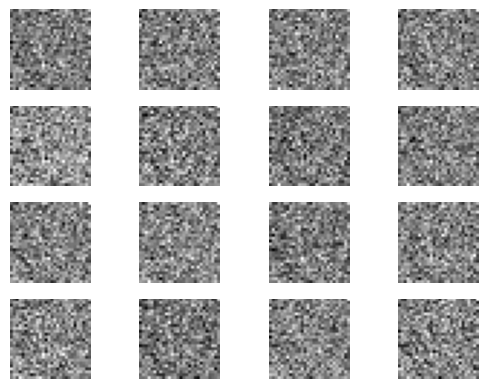

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import mnist

# Carregar o conjunto de dados nor
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalizar para o intervalo [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Adicionar a dimensão do canal

# Parâmetros
batch_size = 64
epochs = 100
latent_dim = 100

# Construir o Gerador
def build_generator():
    model = Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Construir o Discriminador
def build_discriminator():
    model = Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Construir o GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

# Instanciar o Gerador e o Discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Instanciar o GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Treinar a GAN
for epoch in range(epochs):
    # Treinar o Discriminador
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    real_labels = np.ones((batch_size, 1))

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Treinar o Gerador
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")
        # Gerar e visualizar imagens
        noise = np.random.normal(0, 1, (16, latent_dim))
        generated_images = generator.predict(noise)
        generated_images = (generated_images + 1) / 2.0  # Reverter a normalização

        fig, axs = plt.subplots(4, 4)
        cnt = 0
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()


